# Task 1
#### Create a 1D tensor with 12 elements ranging from 0 to 11 using torch.arange.

In [77]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


tensor_1d = torch.arange(0, 12)
tensor_1d

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### Check the shape of the tensor and the number of elements it contains using the .shape and .numel() methods.

In [3]:
print(tensor_1d.shape)  
print(tensor_1d.numel())


torch.Size([12])
12


#### Modify the tensor to be of type float32 and verify the change by checking the tensor’s data type.



In [4]:
tensor_1d = tensor_1d.float()
print(tensor_1d.dtype)

torch.float32


# Task 2


#### Reshape the 1D tensor created in Task 1 into a 2D tensor with 3 rows and 4 columns.



In [6]:
tensor_2d = tensor_1d.view(3, 4)
tensor_2d

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

#### Verify the new shape of the tensor using the .shape attribute.



In [7]:
print(tensor_2d.shape)

torch.Size([3, 4])


#### Reshape the tensor again into a 3D tensor with dimensions (2, 2, 3) and print the result.



In [8]:
tensor_3d = tensor_2d.view(2, 2, 3)
print(tensor_3d)


tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])


# Task 3

#### Create a new tensor filled with ones that has the same shape as the tensor created in Task 2.

In [9]:
tensor_ones = torch.ones_like(tensor_2d)


In [10]:
tensor_ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

#### Add the tensor of ones to the reshaped tensor from Task 2 and print the result.


In [11]:
result_add = tensor_2d + tensor_ones
print(result_add)


tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])


#### Multiply the reshaped tensor by 2 and print the result.


In [12]:
result_mul = tensor_2d * 2
print(result_mul)


tensor([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.]])


#### Calculate the mean of the elements in the reshaped tensor.



In [14]:
mean_val = tensor_2d.mean()
print(mean_val)


tensor(5.5000)


# Task 4

#### Slice the reshaped tensor to extract the first row.




In [15]:
first_row = tensor_2d[0, :]
print(first_row)


tensor([0., 1., 2., 3.])


#### Extract the last column of the reshaped tensor.


In [16]:
last_column = tensor_2d[:, -1]
print(last_column)


tensor([ 3.,  7., 11.])


#### Modify the sliced portion by setting all its values to 10 and observe how the original tensor changes.



In [17]:
tensor_2d[0, :] = 10
print(tensor_2d)


tensor([[10., 10., 10., 10.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])


# Task 5

#### Convert the reshaped tensor from Task 2 into a NumPy array using the .numpy() method.



In [18]:
numpy_array = tensor_2d.numpy()


#### Perform an element-wise addition on the NumPy array.



In [19]:
numpy_array += 1


#### Convert the modified NumPy array back to a PyTorch tensor and verify its data type and shape.



In [20]:
tensor_from_numpy = torch.tensor(numpy_array)
print(tensor_from_numpy.dtype)
print(tensor_from_numpy.shape)  


torch.float32
torch.Size([3, 4])


# Task 6


#### Create a CSV file named house_tiny.csv with the specified columns and data.

#### Load the CSV file into a Pandas DataFrame using the pd.read_csv() function.

In [70]:
df = pd.read_csv('house_tiny.csv')


#### Perform one-hot encoding on the RoofType column, treating NaN as a separate category using pd.get_dummies().



In [71]:
df = pd.get_dummies(df, columns=['RoofType'], dummy_na=True)


#### Replace the NaN entries in the NumRooms column with the mean value of that column using .fillna().



In [74]:
df['NumRooms'].fillna(df['NumRooms'].mean(), inplace=True)
# df['NumRooms'] = df['NumRooms'].astype('float32')

df['RoofType_Slate'] = df['RoofType_Slate'].astype(int)
df['RoofType_nan'] = df['RoofType_nan'].astype(int)
df



,NumRooms,Price,RoofType_Slate,RoofType_nan
0,3.0,127500,0,1
1,2.0,106000,0,1
2,4.0,178100,1,0
3,3.0,140000,0,1


#### Convert the resulting DataFrame into a PyTorch tensor using torch.tensor().



In [75]:
tensor_from_df = torch.tensor(df.values, dtype=torch.float32)


In [76]:
tensor_from_df

tensor([[3.0000e+00, 1.2750e+05, 0.0000e+00, 1.0000e+00],
        [2.0000e+00, 1.0600e+05, 0.0000e+00, 1.0000e+00],
        [4.0000e+00, 1.7810e+05, 1.0000e+00, 0.0000e+00],
        [3.0000e+00, 1.4000e+05, 0.0000e+00, 1.0000e+00]])

# Task 7

#### Create a 3×3 matrix A with the specified elements.

In [47]:
A = torch.tensor([[1, 2, 3], [2, 4, 5], [3, 5, 6]])


#### Compute the transpose of the matrix A.



In [48]:
A_T = A.t()


#### Verify if the matrix A is symmetric by checking if A is equal to its transpose.



In [49]:
is_symmetric = torch.equal(A, A_T)
print(is_symmetric)


True


#### Create a non-symmetric 3×3 matrix and demonstrate that it is not equal to its transpose.



In [50]:
B = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
is_symmetric_B = torch.equal(B, B.t())
print(is_symmetric_B)

False


# Task 8

#### Given the function h(x) = 3x^3 - 2x^2 + 5x - 7

#### Define the function h(x) and its derivative h'(x) in Python.

In [51]:
def h(x):
    return 3*x**3 - 2*x**2 + 5*x - 7

def h_prime(x):
    return 9*x**2 - 4*x + 5


#### Evaluate the derivative at x = 1 and x = 2.



In [52]:
print(h_prime(1))
print(h_prime(2))  

10
33


#### Plot the original function h(x) and its derivative h'(x) over the range x = -2 to x = 3.



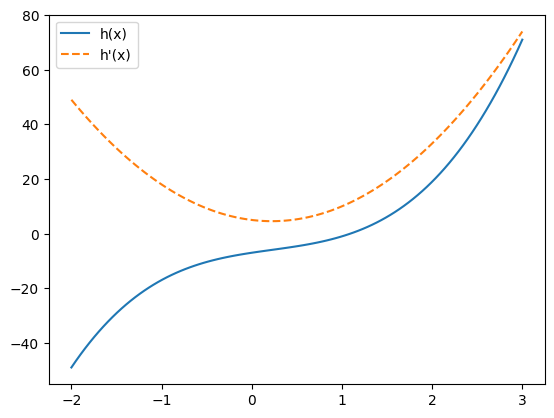

In [53]:
x = np.linspace(-2, 3, 100)
y = h(x)
y_prime = h_prime(x)

plt.plot(x, y, label='h(x)')
plt.plot(x, y_prime, label="h'(x)", linestyle='--')
plt.legend()
plt.show()
